In [27]:
pip install spotipy


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [58]:
#pip install sklearn

    ERROR: Command errored out with exit status 1:
     command: /usr/local/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/m2/jgw19hkx4vz_gzpmw42_b1bm0000gn/T/pip-install-0x1k4mra/sklearn_36851fe6a34545a29a65f1e63b5078dd/setup.py'"'"'; __file__='"'"'/private/var/folders/m2/jgw19hkx4vz_gzpmw42_b1bm0000gn/T/pip-install-0x1k4mra/sklearn_36851fe6a34545a29a65f1e63b5078dd/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/m2/jgw19hkx4vz_gzpmw42_b1bm0000gn/T/pip-pip-egg-info-68j1nlym
         cwd: /private/var/folders/m2/jgw19hkx4vz_gzpmw42_b1bm0000gn/T/pip-install-0x1k4mra/sklearn_36851fe6a34545a29a65f1e63b5078dd/
    Complete output (15 lines):
    The 'sklearn' PyPI package is depr

In [91]:
from spotipy.oauth2 import SpotifyOAuth
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import datetime as dt



In [99]:
client_id = "00dbc84838e6422e994c8adaf6d2599c"
client_secret = "e0412c081983415dbc9319504104b220"
redirect_uri = "http://localhost:8788/callback"

In [98]:
oauth_scopes="user-top-read"
t_range = "long_term"

auth_manager = SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=oauth_scopes)
sp = spotipy.Spotify(auth_manager=auth_manager)


user_top_tracks = sp.current_user_top_tracks(limit=100, time_range=t_range)

In [100]:
top_tracks = {"track":[],"album":[],"artist":[],"ID":[],"popularity":[],"release_date":[],"duration_ms":[], "artist_id":[]}


for i in user_top_tracks["items"]:
    
    top_tracks["track"].append(i['name'])
    top_tracks["album"].append(i['album']['name'])
    top_tracks["artist"].append(i['artists'][0]['name'])
    top_tracks["ID"].append(i['id'])
    top_tracks["popularity"].append(i['popularity'])
    top_tracks["release_date"].append(i['album']['release_date'])
    top_tracks["duration_ms"].append(i['duration_ms'])
    top_tracks["artist_id"].append(i['artists'][0]['id']) 
    
df = pd.DataFrame.from_dict(top_tracks) 


In [101]:
df = pd.DataFrame.from_dict(top_tracks) 
df.head()

,track,album,artist,ID,popularity,release_date,duration_ms,artist_id
0,Unutulacak Dünler,HİZA,Gazapizm,3aXTeIVnDvo2MT1xLTdGK3,64,2020-02-13,295637,2boacFGRX1WIo7NFS8B0F2
1,Tekrar,Tekrar,Karya Çandar,1T5FRePJ0y55PRYGjlxHgn,26,2021-06-11,147771,5cqshWrRR53ssZM2L2P06K
2,Seni Dert Etmeler,Seni Dert Etmeler,Madrigal,10n66m41IGjA2ZulKPK7Ew,74,2020-03-27,188500,2aZlYOswKNlrwqpuTsckKd
3,Kelebekler,Kelebekler,Madrigal,3O9G6FQrqhwQxR0GeeF93Q,61,2019-12-04,247129,2aZlYOswKNlrwqpuTsckKd
4,25,25,Ati242,4HuB9A0O1XwmwTVtTgODm8,72,2022-05-13,210044,6bGOmNBU1AOgttgOjh0ldf


In [78]:
# Assuming df_attributes is your DataFrame
df.to_csv('spotify.csv', index=False)


In [21]:
audio_analysis = sp.audio_features(df['ID'].tolist())


In [22]:
df2 = pd.DataFrame.from_dict(audio_analysis) 


In [23]:
df_full = pd.merge(df, df2, how='inner', left_on = 'ID', right_on = 'id')


In [24]:
genres = []


for artist in df_full['artist_id']:
    genres.append(sp.artist(artist)['genres'])


df_full['genres'] = genres


df_full.head()

,track,album,artist,ID,popularity,release_date,duration_ms_x,artist_id,danceability,energy,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,genres
0,Unutulacak Dünler,HİZA,Gazapizm,3aXTeIVnDvo2MT1xLTdGK3,64,2020-02-13,295637,2boacFGRX1WIo7NFS8B0F2,0.627,0.833,...,0.690,179.935,audio_features,3aXTeIVnDvo2MT1xLTdGK3,spotify:track:3aXTeIVnDvo2MT1xLTdGK3,https://api.spotify.com/v1/tracks/3aXTeIVnDvo2...,https://api.spotify.com/v1/audio-analysis/3aXT...,295637,4,[turkish hip hop]
1,Tekrar,Tekrar,Karya Çandar,1T5FRePJ0y55PRYGjlxHgn,26,2021-06-11,147771,5cqshWrRR53ssZM2L2P06K,0.801,0.875,...,0.368,95.002,audio_features,1T5FRePJ0y55PRYGjlxHgn,spotify:track:1T5FRePJ0y55PRYGjlxHgn,https://api.spotify.com/v1/tracks/1T5FRePJ0y55...,https://api.spotify.com/v1/audio-analysis/1T5F...,147772,4,[]
2,Seni Dert Etmeler,Seni Dert Etmeler,Madrigal,10n66m41IGjA2ZulKPK7Ew,74,2020-03-27,188500,2aZlYOswKNlrwqpuTsckKd,0.552,0.608,...,0.835,88.002,audio_features,10n66m41IGjA2ZulKPK7Ew,spotify:track:10n66m41IGjA2ZulKPK7Ew,https://api.spotify.com/v1/tracks/10n66m41IGjA...,https://api.spotify.com/v1/audio-analysis/10n6...,188500,4,"[turkish alt pop, turkish rock]"
3,Kelebekler,Kelebekler,Madrigal,3O9G6FQrqhwQxR0GeeF93Q,61,2019-12-04,247129,2aZlYOswKNlrwqpuTsckKd,0.697,0.452,...,0.854,82.016,audio_features,3O9G6FQrqhwQxR0GeeF93Q,spotify:track:3O9G6FQrqhwQxR0GeeF93Q,https://api.spotify.com/v1/tracks/3O9G6FQrqhwQ...,https://api.spotify.com/v1/audio-analysis/3O9G...,247130,4,"[turkish alt pop, turkish rock]"
4,25,25,Ati242,4HuB9A0O1XwmwTVtTgODm8,72,2022-05-13,210044,6bGOmNBU1AOgttgOjh0ldf,0.735,0.743,...,0.414,120.031,audio_features,4HuB9A0O1XwmwTVtTgODm8,spotify:track:4HuB9A0O1XwmwTVtTgODm8,https://api.spotify.com/v1/tracks/4HuB9A0O1Xwm...,https://api.spotify.com/v1/audio-analysis/4HuB...,210044,4,[turkish hip hop]


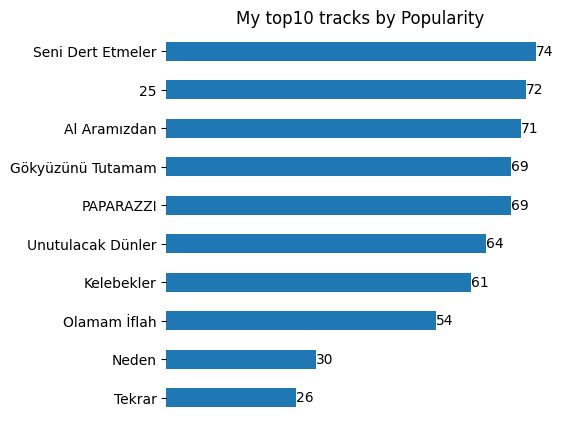

In [25]:
ax = df_full.iloc[:10].sort_values(by='popularity').plot(x='track', y='popularity', kind ="barh", figsize=(5, 5))
ax.get_xaxis().set_visible(False)
ax.get_legend().remove()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.ylabel("")


plt.title('My top10 tracks by Popularity')


plt.bar_label(ax.containers[0])
plt.legend
plt.show()

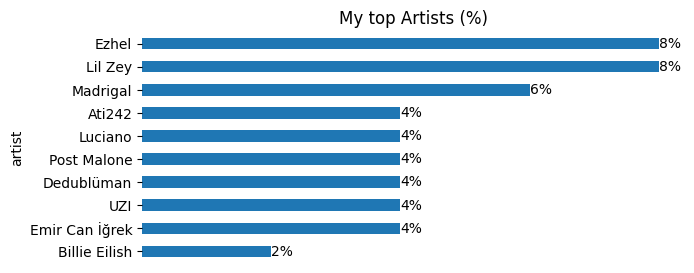

In [26]:
data = df_full['artist'].value_counts(normalize=True) * 100
data=data.head(10)
ax = data.sort_values().plot(kind="barh", figsize=(7, 3))
ax.get_xaxis().set_visible(False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.title('My top Artists (%)')
plt.bar_label(ax.containers[0], fmt='%.0f%%')
plt.show()

In [27]:
df_full.head()

,track,album,artist,ID,popularity,release_date,duration_ms_x,artist_id,danceability,energy,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,genres
0,Unutulacak Dünler,HİZA,Gazapizm,3aXTeIVnDvo2MT1xLTdGK3,64,2020-02-13,295637,2boacFGRX1WIo7NFS8B0F2,0.627,0.833,...,0.690,179.935,audio_features,3aXTeIVnDvo2MT1xLTdGK3,spotify:track:3aXTeIVnDvo2MT1xLTdGK3,https://api.spotify.com/v1/tracks/3aXTeIVnDvo2...,https://api.spotify.com/v1/audio-analysis/3aXT...,295637,4,[turkish hip hop]
1,Tekrar,Tekrar,Karya Çandar,1T5FRePJ0y55PRYGjlxHgn,26,2021-06-11,147771,5cqshWrRR53ssZM2L2P06K,0.801,0.875,...,0.368,95.002,audio_features,1T5FRePJ0y55PRYGjlxHgn,spotify:track:1T5FRePJ0y55PRYGjlxHgn,https://api.spotify.com/v1/tracks/1T5FRePJ0y55...,https://api.spotify.com/v1/audio-analysis/1T5F...,147772,4,[]
2,Seni Dert Etmeler,Seni Dert Etmeler,Madrigal,10n66m41IGjA2ZulKPK7Ew,74,2020-03-27,188500,2aZlYOswKNlrwqpuTsckKd,0.552,0.608,...,0.835,88.002,audio_features,10n66m41IGjA2ZulKPK7Ew,spotify:track:10n66m41IGjA2ZulKPK7Ew,https://api.spotify.com/v1/tracks/10n66m41IGjA...,https://api.spotify.com/v1/audio-analysis/10n6...,188500,4,"[turkish alt pop, turkish rock]"
3,Kelebekler,Kelebekler,Madrigal,3O9G6FQrqhwQxR0GeeF93Q,61,2019-12-04,247129,2aZlYOswKNlrwqpuTsckKd,0.697,0.452,...,0.854,82.016,audio_features,3O9G6FQrqhwQxR0GeeF93Q,spotify:track:3O9G6FQrqhwQxR0GeeF93Q,https://api.spotify.com/v1/tracks/3O9G6FQrqhwQ...,https://api.spotify.com/v1/audio-analysis/3O9G...,247130,4,"[turkish alt pop, turkish rock]"
4,25,25,Ati242,4HuB9A0O1XwmwTVtTgODm8,72,2022-05-13,210044,6bGOmNBU1AOgttgOjh0ldf,0.735,0.743,...,0.414,120.031,audio_features,4HuB9A0O1XwmwTVtTgODm8,spotify:track:4HuB9A0O1XwmwTVtTgODm8,https://api.spotify.com/v1/tracks/4HuB9A0O1Xwm...,https://api.spotify.com/v1/audio-analysis/4HuB...,210044,4,[turkish hip hop]


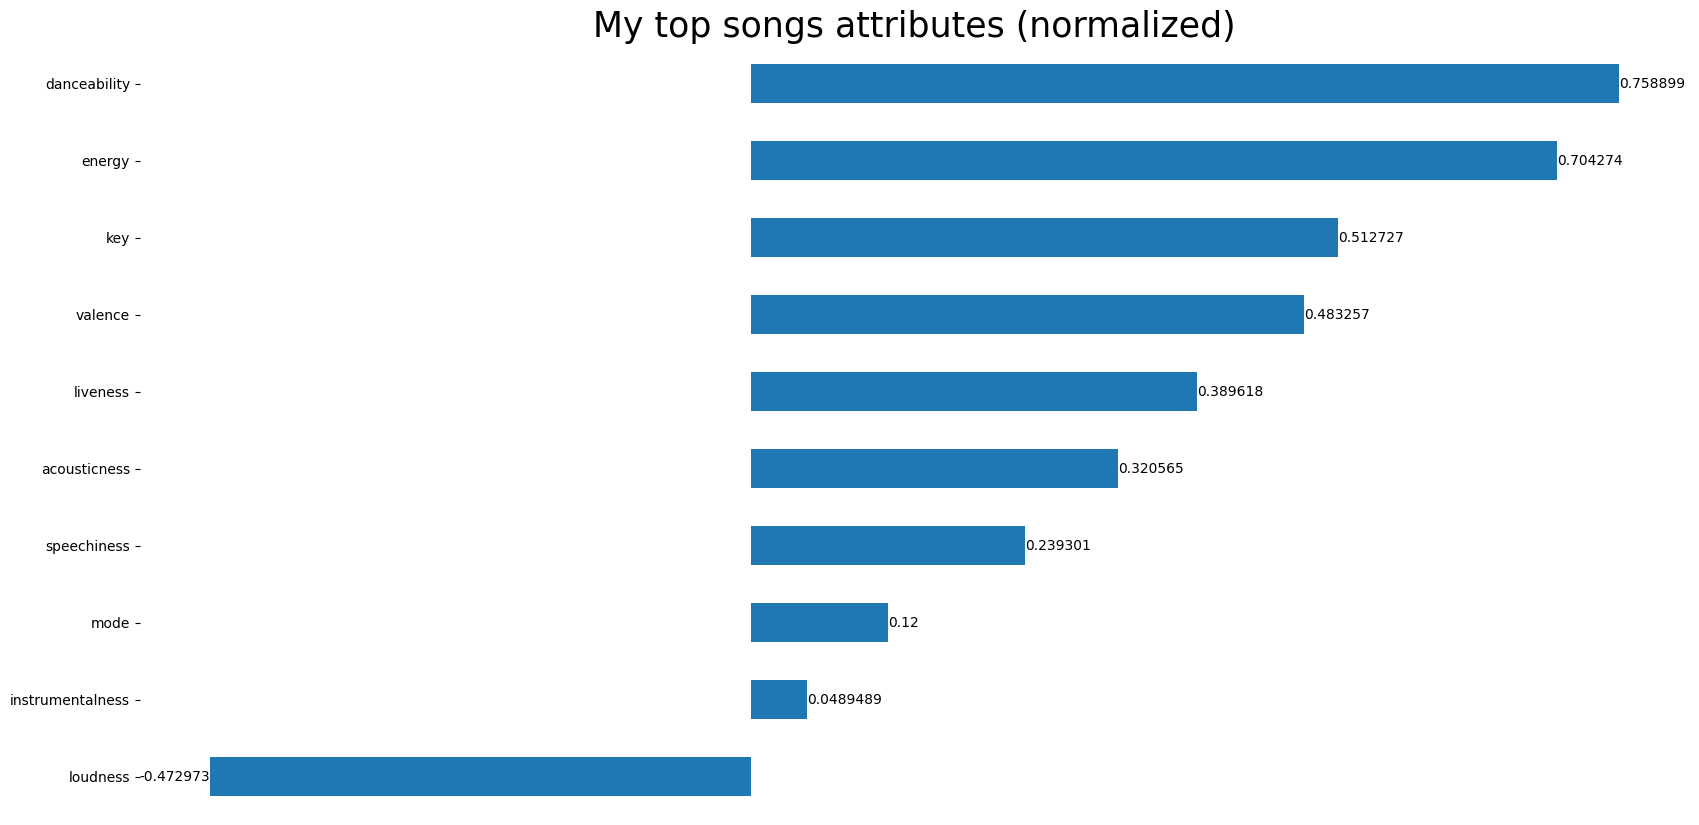

In [29]:
df_attributes = df_full[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']]


for column in df_attributes.columns:
    df_attributes.loc[:, column] = df_attributes[column]  / df_attributes[column].abs().max()


ax = df_attributes.mean().sort_values(ascending=True).plot(kind="barh", figsize=(20, 10), ) 
ax.get_xaxis().set_visible(False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.title('My top songs attributes (normalized)').set_size(25)
plt.bar_label(ax.containers[0])
plt.show()

/var/folders/m2/jgw19hkx4vz_gzpmw42_b1bm0000gn/T/ipykernel_841/307868043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes['track'] = df_full['track']


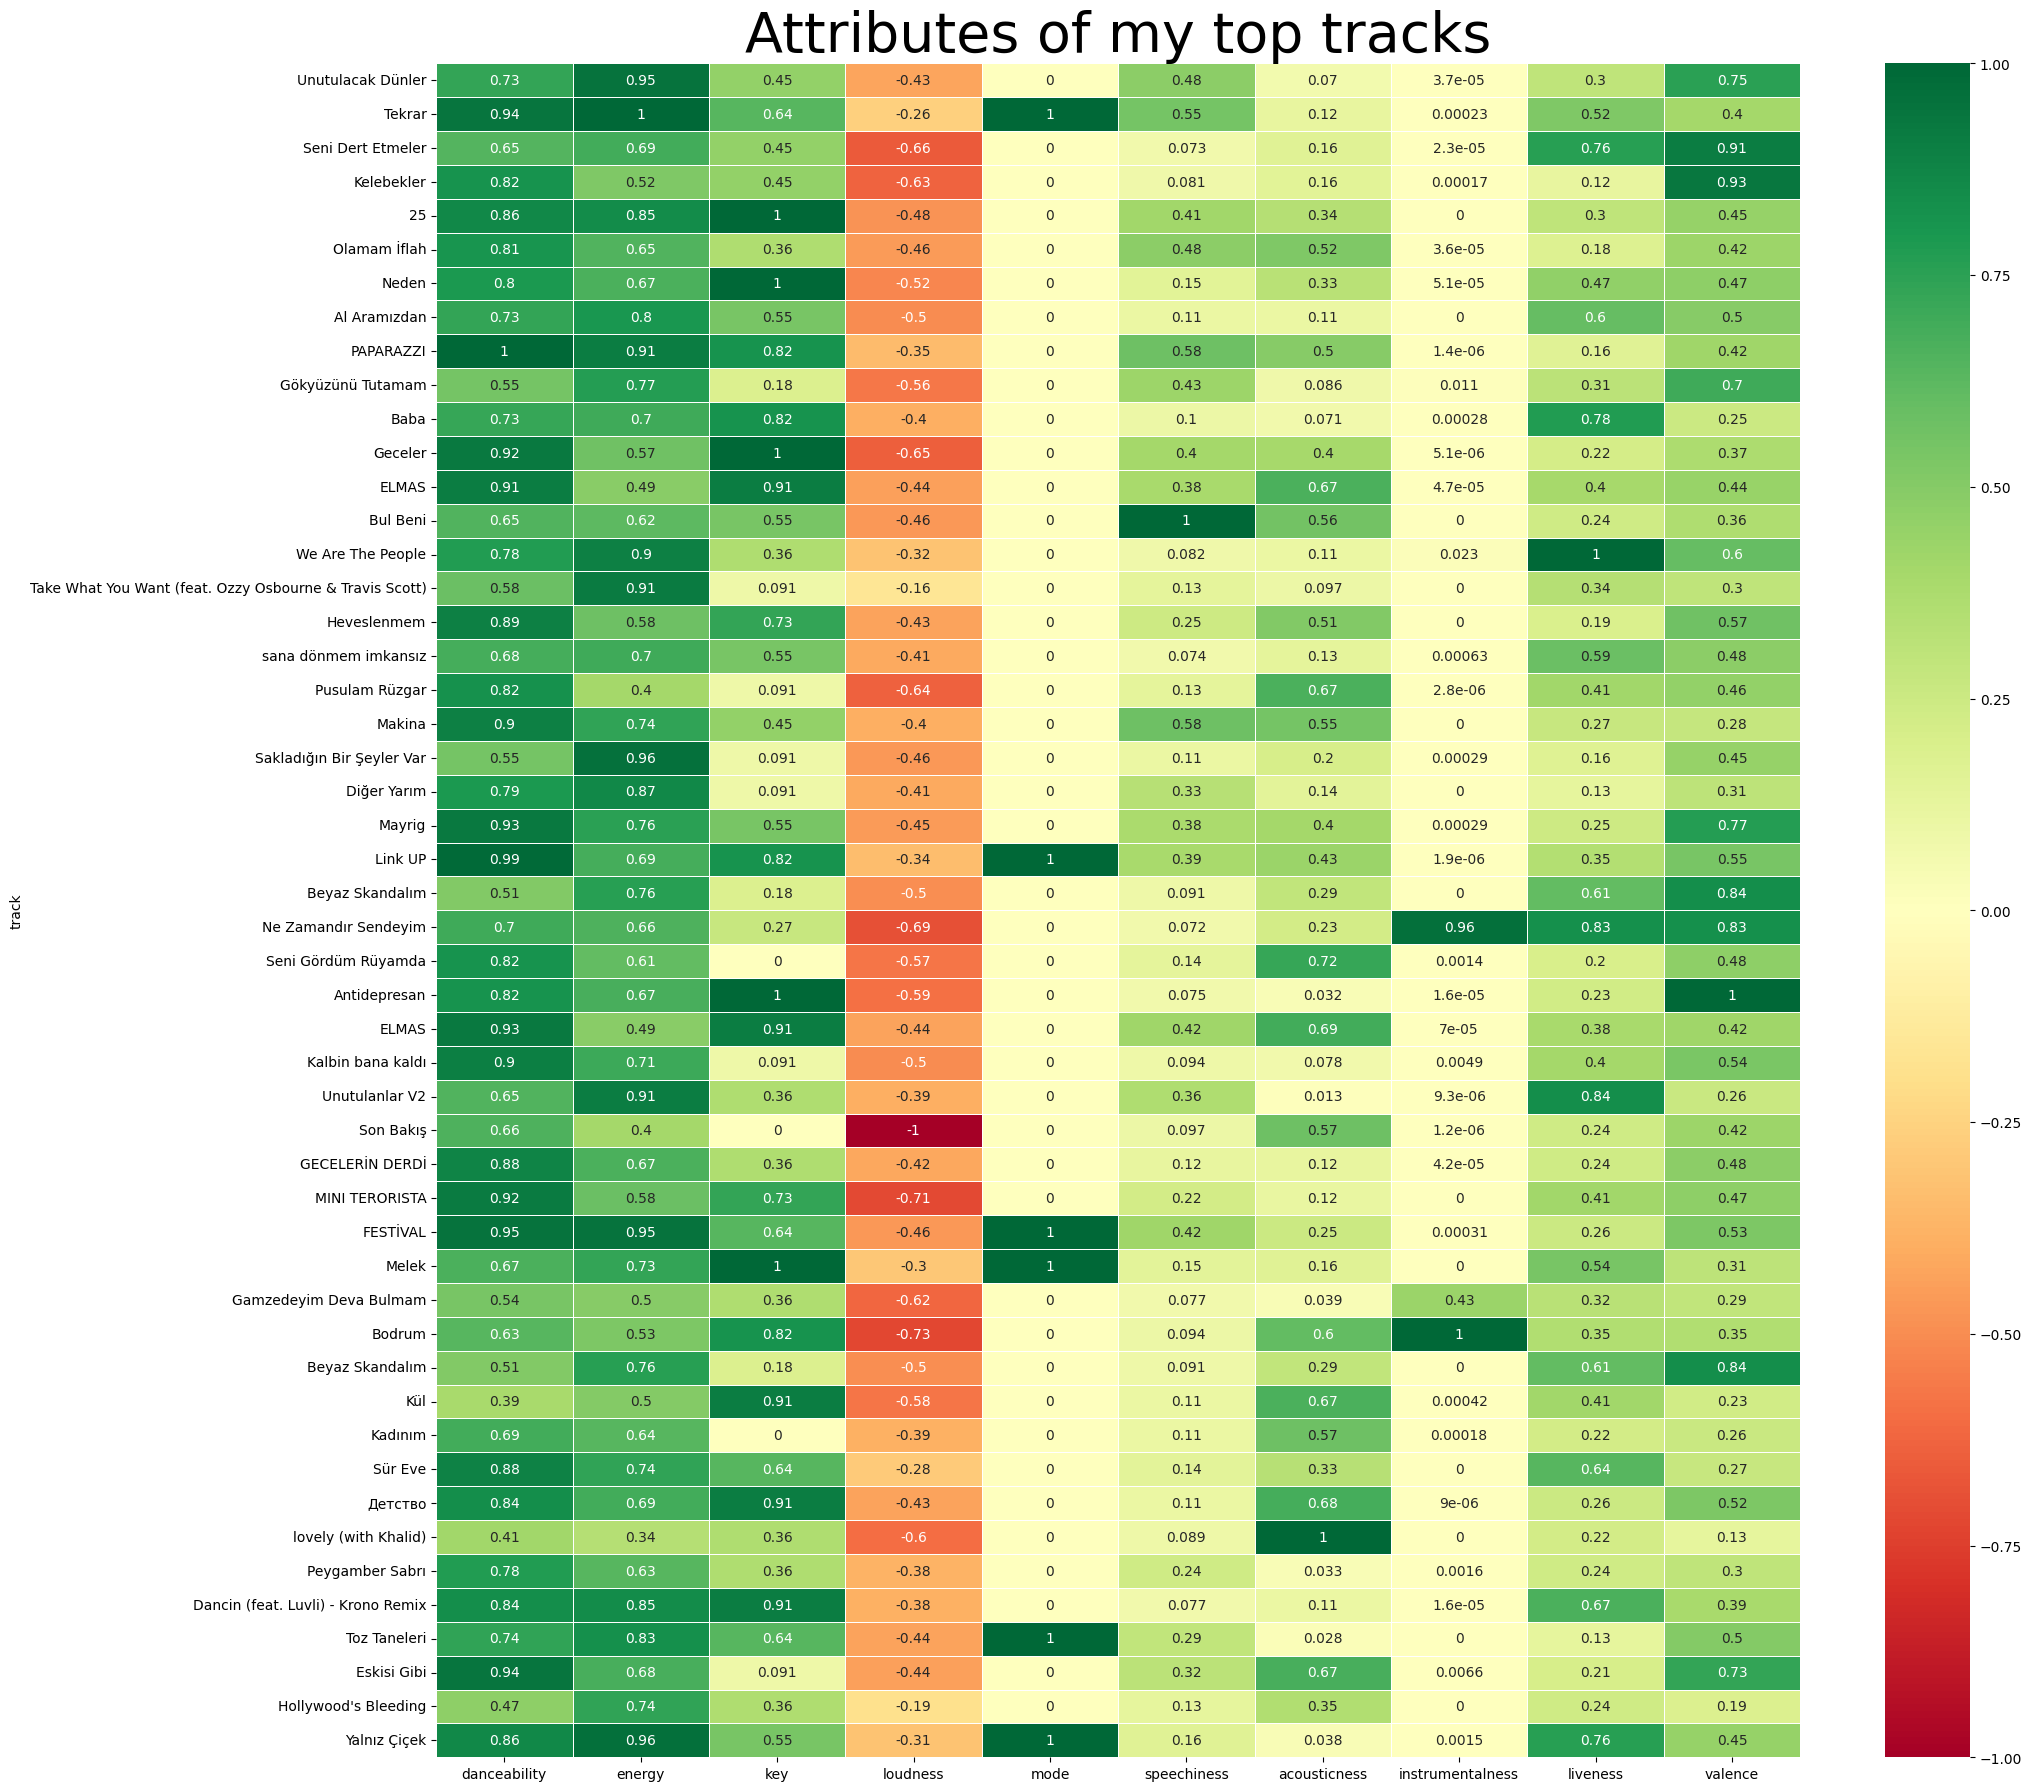

In [21]:
df_attributes['track'] = df_full['track']

plt.figure(figsize = (22,22))

sns.heatmap(df_attributes.set_index('track'), annot=True, linewidths=.5, cmap="RdYlGn")

plt.title("Attributes of my top tracks").set_size(40)

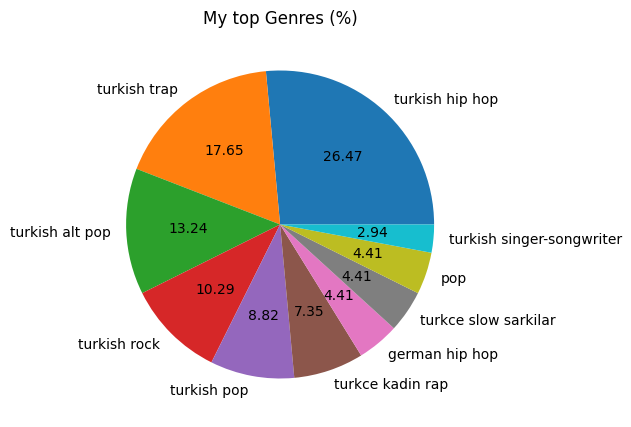

In [30]:
flat_list = [item for sublist in df_full['genres'].tolist() for item in sublist]

x = pd.Series(flat_list)

data = x.value_counts(normalize=True) * 100

plot = data.head(10).plot.pie(y=data.values.tolist(), figsize=(5, 5), autopct='%.2f')
plt.ylabel("")

plt.title('My top Genres (%)')
plt.show()

In [31]:
# Basic Dataset Information
print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (50, 8)
Data Types:
 track           object
album           object
artist          object
ID              object
popularity       int64
release_date    object
duration_ms      int64
artist_id       object
dtype: object
Missing Values:
 track           0
album           0
artist          0
ID              0
popularity      0
release_date    0
duration_ms     0
artist_id       0
dtype: int64


In [47]:
# Descriptive Statistics for Numerical Features
print("Descriptive Statistics:\n", df_full.describe())

Descriptive Statistics:
        popularity  duration_ms_x  danceability     energy        key  \
count   50.000000      50.000000     50.000000  50.000000  50.000000   
mean    58.720000  208585.500000      0.648100   0.616240   5.640000   
std     19.252394   48951.359952      0.133407   0.140253   3.492032   
min      0.000000  134400.000000      0.330000   0.296000   0.000000   
25%     54.000000  180356.000000      0.558750   0.535500   3.250000   
50%     64.000000  198026.500000      0.678000   0.609500   5.500000   
75%     69.750000  227069.500000      0.761000   0.718500   9.000000   
max     91.000000  352773.000000      0.854000   0.875000  11.000000   

       loudness       mode  speechiness  acousticness  instrumentalness  \
count  50.00000  50.000000    50.000000     50.000000         50.000000   
mean   -8.02966   0.120000     0.089738      0.299408          0.043026   
std     2.52791   0.328261     0.072058      0.232886          0.177431   
min   -16.97700   0.000000

Text(0.5, 1.0, 'Distribution of Track Popularity')

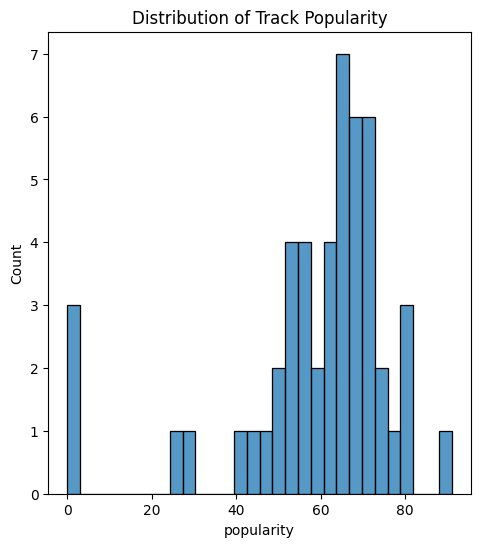

In [49]:
# Distribution of Numerical Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=30)
plt.title('Distribution of Track Popularity')

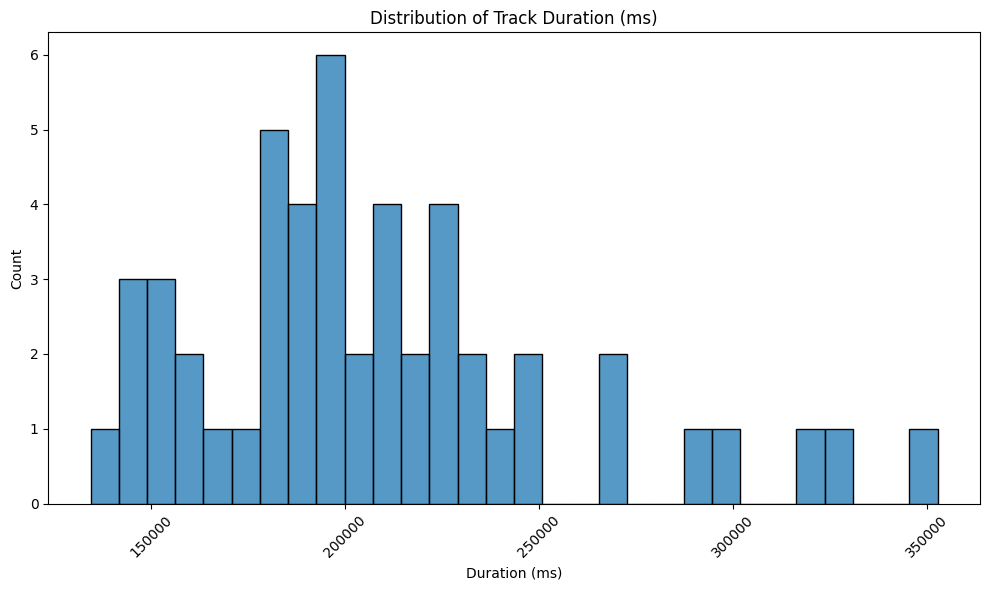

In [38]:
plt.figure(figsize=(10, 6))  # Increase figure size
sns.histplot(df['duration_ms'], bins=30)
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
plt.xlabel('Duration (ms)')
plt.title('Distribution of Track Duration (ms)')

# Optional: Set custom ticks interval if needed
# ax = plt.gca()  # Get the current Axes instance
# ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Set the number of bins

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()



In [51]:
# Categorical Data Analysis - Tracks per Artist and per Album
artist_track_count = df_full['artist'].value_counts()
album_track_count = df_full['album'].value_counts()
print(artist_track_count)
print("/n")
print(album_track_count)

artist
Lil Zey                  4
Ezhel                    4
Madrigal                 3
Emir Can İğrek           2
UZI                      2
Dedublüman               2
Post Malone              2
Luciano                  2
Ati242                   2
Billie Eilish            1
Rauf & Faik              1
Aaron Smith              1
Ati 242                  1
Güneş                    1
Sagopa Kajmer            1
Yüksek Sadakat           1
Cem Adrian               1
Yüzyüzeyken Konuşuruz    1
Reynmen                  1
Jeff Redd                1
BEGE                     1
Sezen Aksu               1
Gazapizm                 1
ALIZADE                  1
Mert Demir               1
Canozan                  1
Karya Çandar             1
ATE                      1
Melike Şahin             1
sevimo.                  1
Empire of the Sun        1
Diyar Pala               1
Can Koç                  1
KÖFN                     1
Mudi                     1
Aleyna Tilki             1
Name: count, dtype: i

In [45]:
# Convert 'release_date' to datetime and extract year for analysis
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
print(df['release_date'])
print(df['release_year'])

0    2020-02-13
1    2021-06-11
2    2020-03-27
3    2019-12-04
4    2022-05-13
5    2021-05-28
6    2021-01-08
7    2023-04-14
8    2021-11-19
9    2021-07-23
10   2010-04-01
11   2017-05-25
12   2021-07-01
13   2021-07-02
14   2008-01-01
15   2019-09-06
16   2020-03-06
17   2021-02-26
18   2021-09-24
19   2021-03-19
20   2021-07-16
21   2022-07-08
22   2021-09-17
23   2020-11-20
24   2018-11-07
25   2021-04-09
26   2019-12-06
27   2022-11-04
28   2021-05-06
29   2022-07-29
30   2015-10-14
31   1989-07-07
32   2021-01-29
33   2023-11-10
34   2022-04-01
35   2020-12-06
36   2020-02-01
37   2018-02-23
38   2018-11-07
39   2021-01-16
40   2008-12-13
41   2021-12-10
42   2018-09-28
43   2018-04-19
44   2021-05-28
45   2014-11-07
46   2019-11-29
47   2020-07-10
48   2019-09-06
49   2018-05-21
Name: release_date, dtype: datetime64[ns]
0     2020
1     2021
2     2020
3     2019
4     2022
5     2021
6     2021
7     2023
8     2021
9     2021
10    2010
11    2017
12    2021
13    2021
14  

In [52]:
# Distribution of Track Releases Over Time
yearly_release_count = df['release_year'].value_counts().sort_index()
print(yearly_release_count)

release_year
1989     1
2008     2
2010     1
2014     1
2015     1
2017     1
2018     6
2019     5
2020     7
2021    18
2022     5
2023     2
Name: count, dtype: int64


Text(0, 0.5, 'Artist')

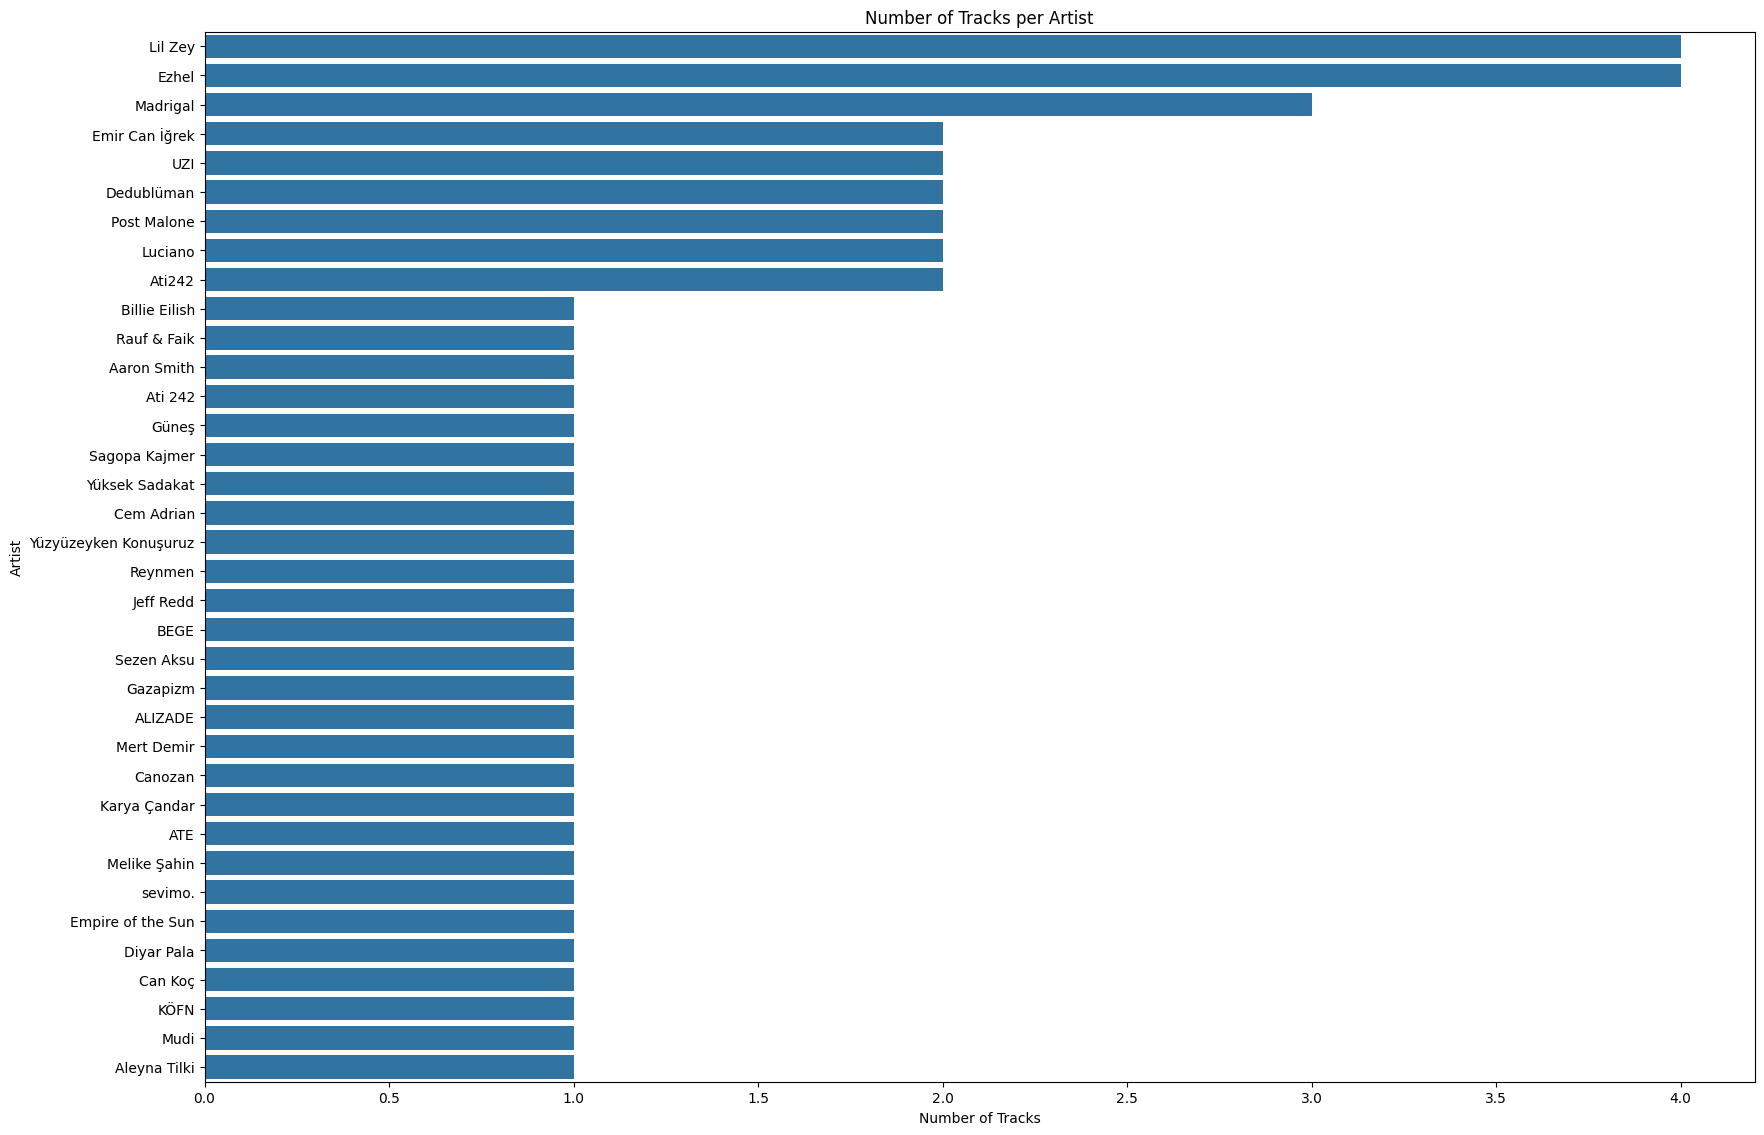

In [54]:
# Plotting the distributions
plt.figure(figsize=(20, 30))
plt.subplot(2, 1, 1)
sns.barplot(x=artist_track_count.values, y=artist_track_count.index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')


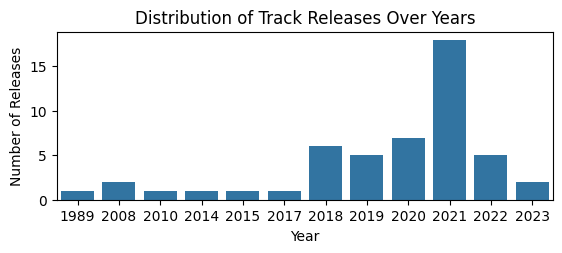

In [55]:
plt.subplot(2, 1, 2)
sns.barplot(x=yearly_release_count.index, y=yearly_release_count.values)
plt.title('Distribution of Track Releases Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


In [56]:
# Displaying top 5 artists and albums in terms of track counts
print("Top 5 Artists by Track Count:\n", artist_track_count.head(5))
print("Top 5 Albums by Track Count:\n", album_track_count.head(5))

Top 5 Artists by Track Count:
 artist
Lil Zey           4
Ezhel             4
Madrigal          3
Emir Can İğrek    2
UZI               2
Name: count, dtype: int64
Top 5 Albums by Track Count:
 album
Ağır Roman              2
Kara Tiyatro            2
Hollywood's Bleeding    2
Melek                   1
Seni Gördüm Rüyamda     1
Name: count, dtype: int64


In [76]:
# Define features and target
# Since 'artist_popularity' is not available, we will exclude it
features = df_full[['duration_ms_x', 'release_year']]
target = df_full['popularity']

# Inside your ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['duration_ms_x']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['release_year'])
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a modeling pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 755.36
R-squared: 0.03


Feature Selection
We have selected duration_ms and release_date as our features. These are quantitative and temporal features, respectively, that could influence a track's popularity. Additionally, we hypothesized the existence of an artist_popularity feature, which represents the historical popularity of the artist. This feature would need to be engineered separately, often using additional data, such as average popularity of all songs by the artist or the artist's follower count. For this example, we'll assume that artist_popularity is a numerical column in our dataset.

Data Preprocessing
Before we can use the features for modeling, we need to preprocess them:

Numerical Features: We use StandardScaler to scale the numerical features (duration_ms and artist_popularity). Scaling helps to normalize the data within a particular range and also speeds up the calculations in an algorithm.
Categorical Features: The release_year extracted from release_date is a categorical feature that we encode using OneHotEncoder. One-hot encoding converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.
Model Selection
We have chosen a Linear Regression model as it's a good starting point for regression problems. It's simple, interpretable, and serves as a baseline for comparison with more complex models.

Model Training
We create a Pipeline that includes both preprocessing and the model. This pipeline ensures that the same preprocessing steps are applied to the training data and the test data in a consistent way. We then fit this pipeline to the training data.

Model Evaluation
After predicting popularity scores for the test set, we use two metrics to evaluate the model's performance:

Mean Squared Error (MSE): This measures the average squared difference between the estimated values and the actual value. Lower MSE values indicate better fit.
R-squared: This is the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared score of 1 indicates a perfect fit.



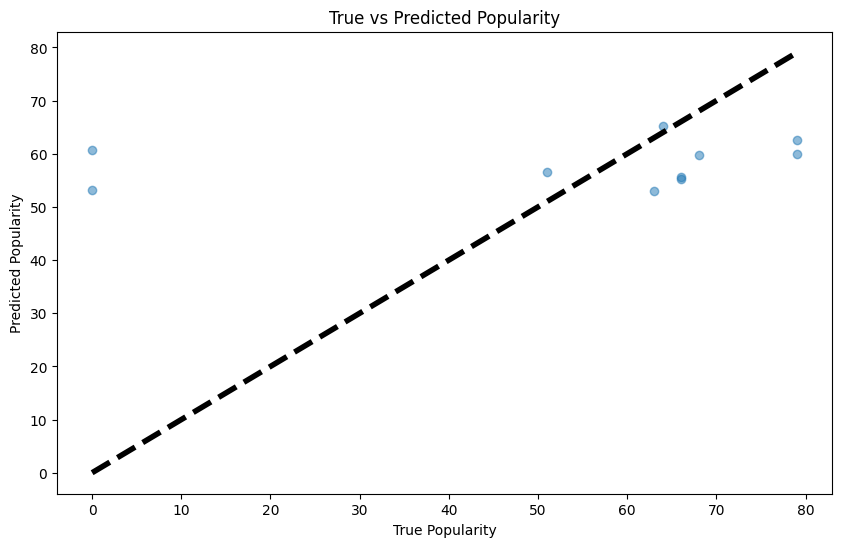

In [77]:
import matplotlib.pyplot as plt

# Assuming the previous code for setting up and training the linear regression model has been executed

# Use the model to make predictions on the test set
y_pred = pipeline.predict(X_test)

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs Predicted Popularity')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
